In [1]:
from lsh import *
from utils import *
from query import *

%load_ext autoreload
%autoreload 2

In [2]:
PATH_IMGS     = "imnet-val/val/"
FILE_FEATURES = "imnet-val/cnn-5000.p"
FNAME_OFFSET  = 48 #prefix of stored file names to chop off
IMSIZE        = (224, 224)

data = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)
N_data = data.X.shape[1]

PATH_IMGS     = "imnet-test-1000/imgs/"
FILE_FEATURES = "imnet-test-1000/cnn-1000.p"
FNAME_OFFSET  = 23 #prefix of stored file names to chop off
IMSIZE        = (224, 224)
queries = dataset(FILE_FEATURES,PATH_IMGS,IMSIZE,normalize=True,fname_offt=FNAME_OFFSET)

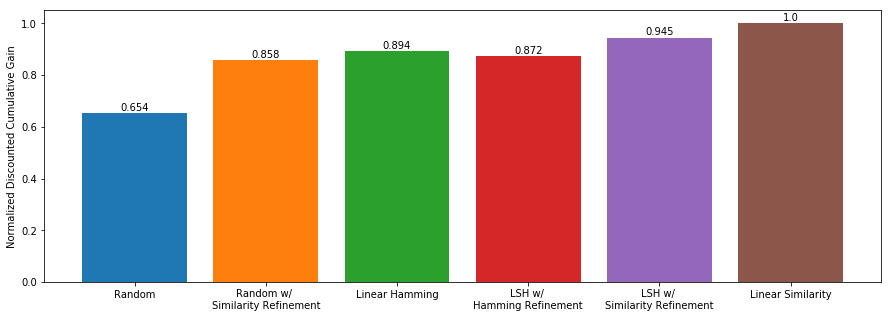

1.6092801094055176 0.9452038283936979


In [3]:
b = 200 #hash bits
M = 30  #number of permutations

query_obj = query(data=data, queries_dataset=queries, hash_bits=b, 
                  permutations=M)

L = 4   #number of neighbors to make candidates
k = 10  #top-k nearest neighbors
N_queries = 100

t, ndgc = query_obj.time_and_compare(N_queries, N_neighbor_candidates=L, k_report=k)
query_obj.ndgc_plot()
